# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

#### Reframing the task with technical vocabulary



From a data perspective, this task involves developing a predictive model to estimate used car prices based on available vehicle attributes.
The objective is to:
- perform exploratory data analysis (EDA) to identify key features influencing car prices
- apply data preprocessing techniques to prepare the dataset
- and use statistical and machine learning models to quantify the impact of each feature

The goal is to derive actionable insights that explain variation in car prices and inform pricing strategies for the dealership.

- Step 1: Load and Preview the Data
  - Let’s load the data and check the structure — including target variable (price) and potential predictors (e.g., year, mileage, make, model, condition, etc.).

- Step 2: Data Cleaning
  - Remove duplicates and rows with missing or invalid values
  - Convert categorical variables to appropriate types
  - Remove outliers (e.g., prices < $500 or > $100,000)

- Step 3: Exploratory Data Analysis (EDA)
  - We’ll analyze how various features influence price:
    - Year of manufacture
    - Odometer (mileage)
    - Condition (new, excellent, good, etc.)
    - Manufacturer
    - Fuel type, transmission, drive, size, etc.

- Step 4: Feature Engineering
  - Convert categorical variables to dummy variables
  - Create new features (e.g., car age = 2025 - year)

- Step 5: Modeling: Use models like:
  - Linear Regression to get interpretable feature importances
  - Use One Hot Encoding (OHE) for Categorical features
  - Use (or not use) polynomials and see if that makes it better or worse

- Step 6: Insights & Recommendations
  - Evaluate model performance using MSE
  - Look at the top features and their coefficients
  - Decide which model is better
  - Deliver report to client summarizing what kind of cars would improve sales

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# load the data
data = pd.read_csv('data/vehicles.csv')
data.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
322843,7316737575,portland,16590,2016.0,mini,hardtop 4 door cooper,good,NaN,other,45635.0,clean,other,WMWXU1C59G2D09870,fwd,NaN,hatchback,red,or
223173,7301671862,springfield,9000,2014.0,mazda,cx-5,excellent,4 cylinders,gas,194000.0,clean,automatic,NaN,fwd,mid-size,SUV,black,mo
58266,7307030152,san luis obispo,90000,2020.0,mercedes-benz,sprinter,NaN,NaN,diesel,9700.0,clean,automatic,NaN,NaN,NaN,van,white,ca
196737,7316157550,detroit metro,5000,2002.0,cadillac,deville,NaN,NaN,gas,90000.0,clean,automatic,1G6KF57922U281273,NaN,full-size,other,custom,mi
379459,7314316913,odessa / midland,7500,1993.0,chevrolet,silverado,NaN,NaN,diesel,150000.0,clean,manual,NaN,NaN,NaN,NaN,NaN,tx
10096,7316795030,phoenix,29990,2017.0,infiniti,q60 3.0t premium coupe,good,NaN,other,22933.0,clean,other,JN1EV7EK9HM362880,NaN,NaN,coupe,silver,az
175831,7313844787,monroe,11800,2006.0,ford,e450,NaN,NaN,diesel,111000.0,clean,automatic,NaN,NaN,NaN,NaN,black,la
202657,7305660832,grand rapids,18995,2009.0,ford,f350 super duty,NaN,NaN,diesel,206874.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,mi
204180,7316169867,kalamazoo,1500,2005.0,ford,escape xlt,NaN,NaN,gas,194000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,mi
179361,7311473285,maine,8999,2014.0,toyota,prius hybrid,NaN,NaN,hybrid,129000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,me


In [3]:
# Investigate the dataset for missing or problematic data.
display(data.shape)

# Check data types of each column
print('-' * 10 + 'Check missing values and data types' + '-' * 10)
display(data.info())

(426880, 18)

----------Check missing values and data types----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  objec

None

In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)

# Convert year to age
data['age'] = 2025 - data['year']
data.drop('year', axis=1, inplace=True)

display(data.describe())
display(data.describe(include='object'))

,id,price,odometer,age
count,426880.00,426880.00,422480.00,425675.00
mean,7311486634.22,75199.03,98043.33,13.76
std,4473170.41,12182282.17,213881.50,9.45
min,7207408119.00,0.00,0.00,3.00
25%,7308143339.25,5900.00,37704.00,8.00
50%,7312620821.00,13950.00,85548.00,12.00
75%,7315253543.50,26485.75,133542.50,17.00
max,7317101084.00,3736928711.00,10000000.00,125.00


,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


In [ ]:
# Many rows are missing crucial info:
# Over 1,000 rows have no data beyond id, region, price, and state

# The target variable is price (and all rows have data).
# Key features for predicting price include:
#  age, manufacturer, model, condition, cylinders, fuel, odometer, transmission, drive, type, etc.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [5]:
# find col with 30% or more missing data
droppable = []
for name in data.columns:
  ratio = data[name].isna().mean()
  if ratio > 0.3:
    print(f'{name} = NA: \t{ratio * 100:.2f}%')
    droppable.append(name)

# in the numerical columns `id` doesnt make any sense.
droppable.append('id');

# drop cols with 30% or more missing data
data = data.drop(columns=droppable)

print('------- shape after dropping cols with > 30% NA-------')
display(data.shape)

condition = NA: 	40.79%
cylinders = NA: 	41.62%
VIN = NA: 	37.73%
drive = NA: 	30.59%
size = NA: 	71.77%
paint_color = NA: 	30.50%
------- shape after dropping cols with > 30% NA-------


(426880, 11)

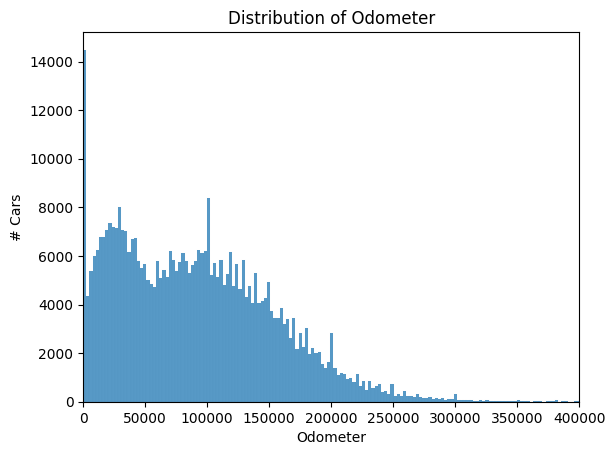

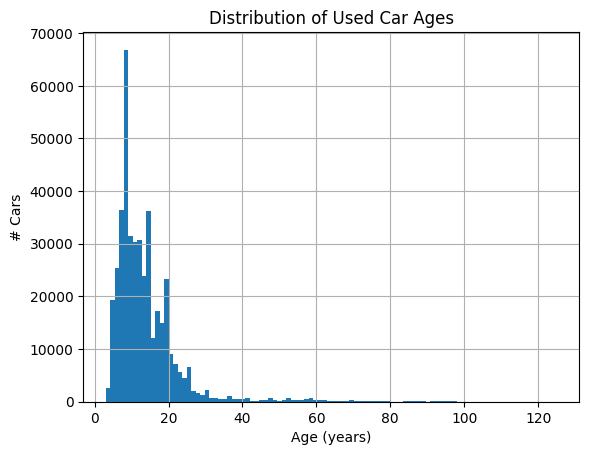

In [6]:
# plot odometer distribution histogram
axes = sns.histplot(data = data, x='odometer')
axes.set_xlim(left=0, right=400000)
axes.set_title('Distribution of Odometer')
axes.set_xlabel('Odometer')
axes.set_ylabel('# Cars')
plt.show()

# plot age distribution histogram
axes = data['age'].hist(bins=100);
axes.set_title('Distribution of Used Car Ages');
axes.set_xlabel('Age (years)')
axes.set_ylabel('# Cars')
plt.show()


In [7]:
# find cars that are suspiciously under/over priced
print(f"Price <= $500: {(data['price'] <= 500).mean() * 100:.2f}%")
print(f"Price >= $100k: {(data['price'] >= 100000).mean() * 100:.2f}%")

# find cars that are suspiciously over driven
print(f"Odometer >= 250k: {(data['odometer'] >= 250000).mean() * 100:.2f}%")

# find the removable rows = sum up all of the above
print(f"Removable rows: {(data['age'].isna() | data['odometer'].isna() | data['manufacturer'].isna() | (data['price'] <= 500) | (data['price'] >= 100000) | (data['odometer'] >= 250000)).mean() * 100:.2f}%")

# Filter out outliers (price < $500 or price > $100k or odometer > 150k miles)
data = data[(data['price'] >= 500) & (data['price'] <= 100000) & (data['odometer'] <= 150000)]

print('------- shape after removing outliers-------')
display(data.shape)

Price <= $500: 10.10%
Price >= $100k: 0.16%
Odometer >= 250k: 1.75%
Removable rows: 15.64%
------- shape after removing outliers-------


(309646, 11)

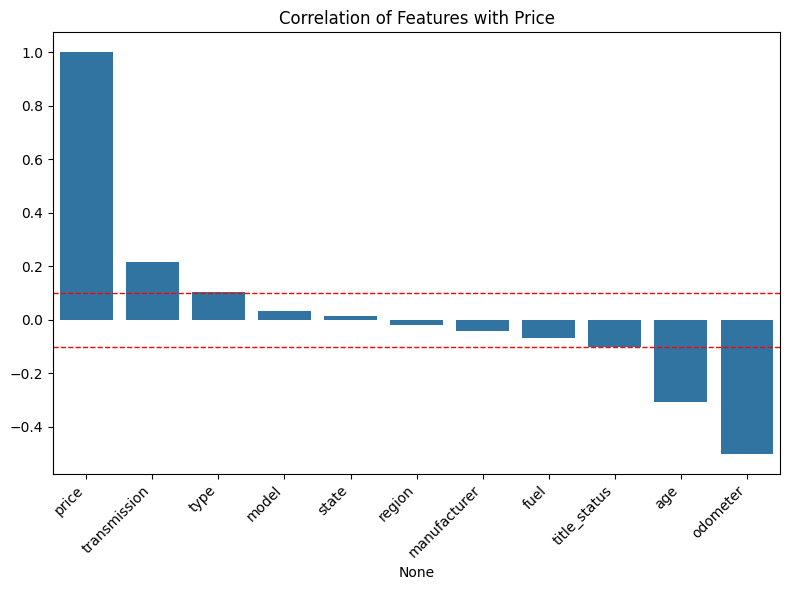


Columns with correlation between 0.10 and 1 or -0.10 and -1 with 'price':


,price
transmission,0.21
type,0.10
title_status,-0.10
age,-0.31
odometer,-0.50


In [8]:
# find correlation between cols and price

# enumerate categorical columns to help with correlation
df_encoded = data.copy()
for col in data.select_dtypes(include='object').columns:
    df_encoded[col] = data[col].astype('category').cat.codes

# Now compute correlation with price
correlation_matrix = df_encoded.corr()
correlations = correlation_matrix['price'].sort_values(ascending=False)

# plot correlations as a chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=correlations.index, y=correlations.values)
plt.title('Correlation of Features with Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
ax.axhline(0.10, color='red', linestyle='--', linewidth=1)
ax.axhline(-0.10, color='red', linestyle='--', linewidth=1)
plt.show()

# Filter for correlations between 0.10 and 1 or -0.10 and -1 (excluding correlation of price with itself)
print("\nColumns with correlation between 0.10 and 1 or -0.10 and -1 with 'price':")
correlations[(correlations.abs() >= 0.10) & (correlations.abs() < 1)]


In [9]:
# ALTERNATELY:
# look at the categorical features and try to determine which ones are useful
# trying to eliminate any category with more than 20 variations:
useful_categories = []
categories = data.select_dtypes(include='object').columns
for cat in categories:
  values = data[cat].dropna().unique().tolist()
  # print(f'{cat}: {values}')
  if len(values) <= 20:
    useful_categories.append(cat)

print(':::::Categories to keep:::::')
print(useful_categories)

:::::Categories to keep:::::
['fuel', 'title_status', 'transmission', 'type']


In [10]:
# based on the correlation values and variartions of categories, we can finally keep: ['price', 'age', 'transmission', 'type', 'title_status', 'odometer']
# that makes the column count - 6 down from 18

keep_columns = ['price', 'age', 'transmission', 'type', 'title_status', 'odometer']
drop_columns = list(set(data.columns) - set(keep_columns))
print('----dropping columns with weaker correlation-----')
print(drop_columns)
data = data.drop(columns=drop_columns)

print('-----remaining data--------')
display(data.shape)
display(data.info())

----dropping columns with weaker correlation-----
['model', 'fuel', 'state', 'manufacturer', 'region']
-----remaining data--------


(309646, 6)

<class 'pandas.core.frame.DataFrame'>
Index: 309646 entries, 27 to 426879
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         309646 non-null  int64  
 1   odometer      309646 non-null  float64
 2   title_status  303922 non-null  object 
 3   transmission  308345 non-null  object 
 4   type          249714 non-null  object 
 5   age           308554 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 16.5+ MB


None

In [11]:
# type is the only col which has 250k non na rows while others are at 300k+
# we dont want other imp rows to be dropped due to this. Lets add an "unknown" type
# to preserve the non na row counts at 300k
data['type'] = data['type'].fillna('unknown')

# now that we have a smaller and cleaner data set lets drop NA rows:
data = data.dropna()
print("----shape after final clean up")
print(data.shape)

data.sample(10)
data.to_csv("data/vehicles_cleaned.csv", index=False)

----shape after final clean up
(301819, 6)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## create utility methods to be used for modeling

## create and return preprocessor based on our choice to use polynomials
def build_preprocessor(is_polynomial):
    # Build ColumnTransformer
    if(is_polynomial):
      # Combine:
      # Polynomial features for numeric features
      # One-hot encoding for categorical features
      # Linear regression model
      # Use a ColumnTransformer to apply transformations selectively, then feed into a pipeline with LinearRegression.
      preprocessor = ColumnTransformer(
        transformers=[
        ("num_poly", PolynomialFeatures(degree=2, include_bias=False), num_cols),
        ("cat_ohe", OneHotEncoder(handle_unknown="ignore"), cat_cols)
      ], force_int_remainder_cols=False,)
    else:
      preprocessor = ColumnTransformer([
          ('cat_ohe', OneHotEncoder(handle_unknown='ignore'), cat_cols)
      ], remainder='passthrough', force_int_remainder_cols=False,)  # Keep numeric as-is

    return preprocessor

## use the pre processor to build, train, fit, predict, evaluate and print MSE
def build_train_predict(preprocessor, X, y):
  # Build pipeline
  pipeline = make_pipeline(
      preprocessor,
      LinearRegression()
  )

  # Train-test split
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42
  )

  # Fit and predict
  pipeline.fit(X_train, y_train)
  train_preds = pipeline.predict(X_train)
  test_preds = pipeline.predict(X_test)

  # Evaluate
  train_mse = mean_squared_error(y_train, train_preds)
  test_mse = mean_squared_error(y_test, test_preds)

  return y_train, train_preds, y_test, test_preds, pipeline, train_mse, test_mse


## polt the train vs prediction and test vs prediction
def plot_test_train(y_train, train_preds, y_test, test_preds):

  # 1. Predicted vs Actual (Train and Test)
  plt.figure(figsize=(12, 5))
  # Train set
  plt.subplot(1, 2, 1)
  plt.scatter(y_train, train_preds, alpha=0.3, color='green')
  # plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
  plt.xlabel('Actual Price')
  plt.ylabel('Predicted Price')
  plt.title('Train: Actual vs Predicted')

  # Test set
  plt.subplot(1, 2, 2)
  plt.scatter(y_test, test_preds, alpha=0.3, color='blue')
  # plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
  plt.xlabel('Actual Price')
  plt.ylabel('Predicted Price')
  plt.title('Test: Actual vs Predicted')

  plt.tight_layout()
  plt.show()

## extract important features from the pipeline
def extract_coeff(is_polynomial, pipeline):
  pd.set_option('display.float_format', '{:.10f}'.format)

  # 1. Get the fitted LinearRegression model
  model = pipeline.named_steps['linearregression']

  # 2. Get transformed feature names
  feature_names = []

  if(is_polynomial):
    # Get names from PolynomialFeatures
    poly = pipeline.named_steps['columntransformer'].named_transformers_['num_poly']
    poly_features = poly.get_feature_names_out(num_cols)

  # Get names from OneHotEncoder
  ohe = pipeline.named_steps['columntransformer'].named_transformers_['cat_ohe']
  ohe_features = ohe.get_feature_names_out(cat_cols)

  # Combine all feature names
  feature_names = np.concatenate([ohe_features, poly_features if is_polynomial else num_cols])

  # 3. Create DataFrame of feature importances
  importances_df = pd.DataFrame({
      'feature': feature_names,
      'coefficient': model.coef_
  }).sort_values(by='coefficient', key=np.abs, ascending=False)

  return importances_df

# plot coeffs for better visual with relative scale
def plot_coeff(importances_df):
  plt.figure(figsize=(10, 6))
  plt.barh(importances_df['feature'], importances_df['coefficient'], color='skyblue')
  plt.xlabel('Coeff Value')
  plt.title('Top 20 Features')
  plt.gca().invert_yaxis()
  plt.tight_layout()
  plt.show()

In [13]:
# Load dataset
df = pd.read_csv("data/vehicles_cleaned.csv")

# Identify column types from EDA section
cat_cols = ['transmission', 'type', 'title_status']
num_cols = ['odometer', 'age']

# Define target and features
y = df['price']
X = df.drop(columns=['price'])

In [14]:
# Run with is_polynomial = False

preprocessor = build_preprocessor(False)
y_train, train_preds, y_test, test_preds, pipeline, train_mse, test_mse = build_train_predict(preprocessor, X, y)
importances_df = extract_coeff(False, pipeline)

eval_non_poly = (y_train, train_preds, y_test, test_preds, pipeline, train_mse, test_mse, importances_df)

In [15]:
# Run with is_polynomial = True

preprocessor = build_preprocessor(True)
y_train, train_preds, y_test, test_preds, pipeline, train_mse, test_mse = build_train_predict(preprocessor, X, y)
importances_df = extract_coeff(True, pipeline)

eval_poly = (y_train, train_preds, y_test, test_preds, pipeline, train_mse, test_mse, importances_df)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat_ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['transmission', 'type',
                                                   'title_status'])])),
                ('linearregression', LinearRegression())])

Train MSE: 118,055,469.90
Test MSE: 116,606,015.11


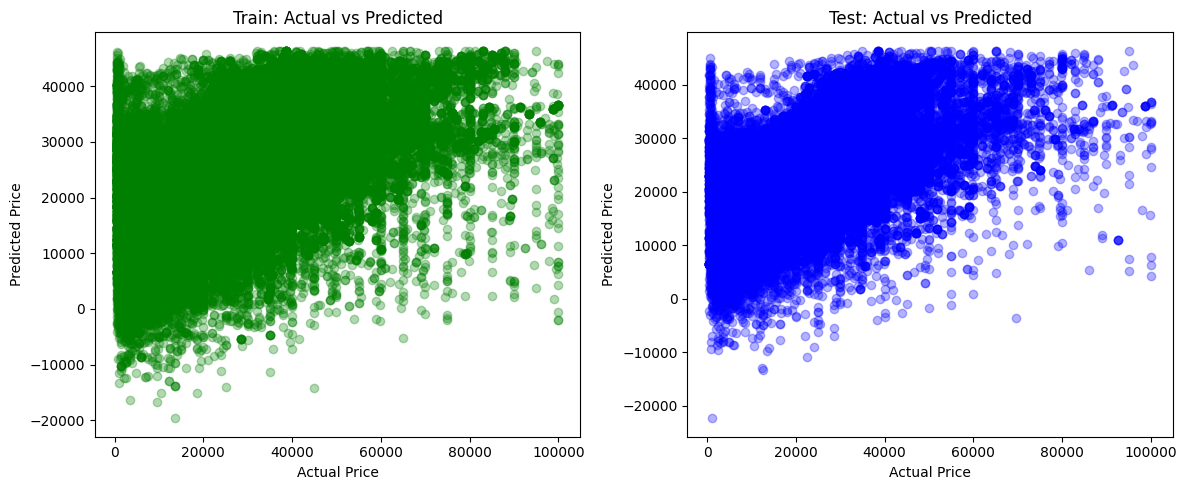

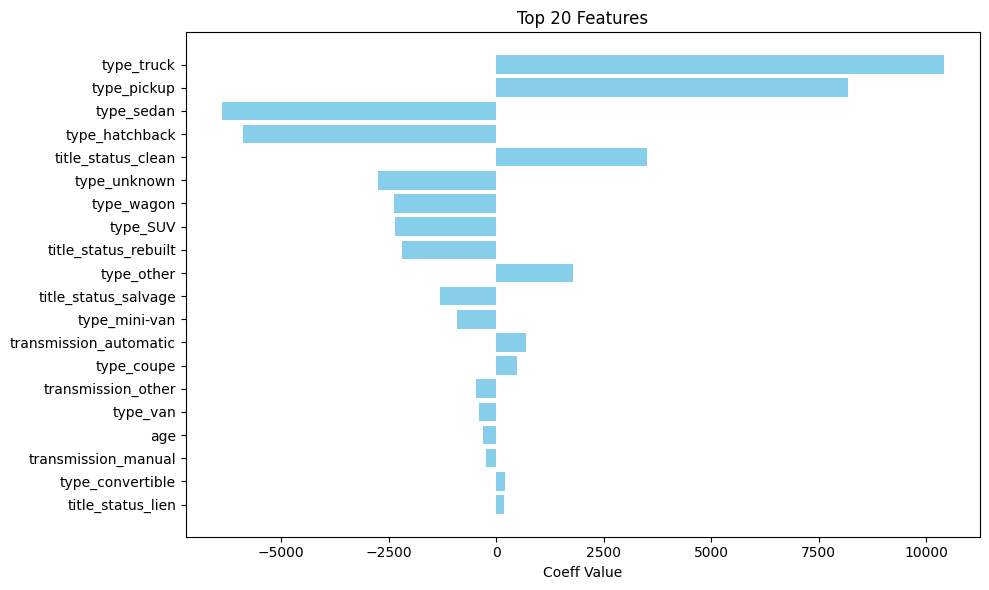

In [16]:
# evaluate non polynomial model MSE and coeff
y_train, train_preds, y_test, test_preds, pipeline, train_mse, test_mse, importances_df = eval_non_poly

# Print errors
display(pipeline)
print(f"Train MSE: {train_mse:,.2f}")
print(f"Test MSE: {test_mse:,.2f}")

# Plot test vs train data
plot_test_train(y_train, train_preds, y_test, test_preds)

# Plot coeffs
plot_coeff(importances_df.head(20))

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   transformers=[('num_poly',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['odometer', 'age']),
                                                 ('cat_ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['transmission', 'type',
                                                   'title_status'])])),
                ('linearregression', LinearRegression())])

Train MSE: 151,882,536.67
Test MSE: 149,935,314.73


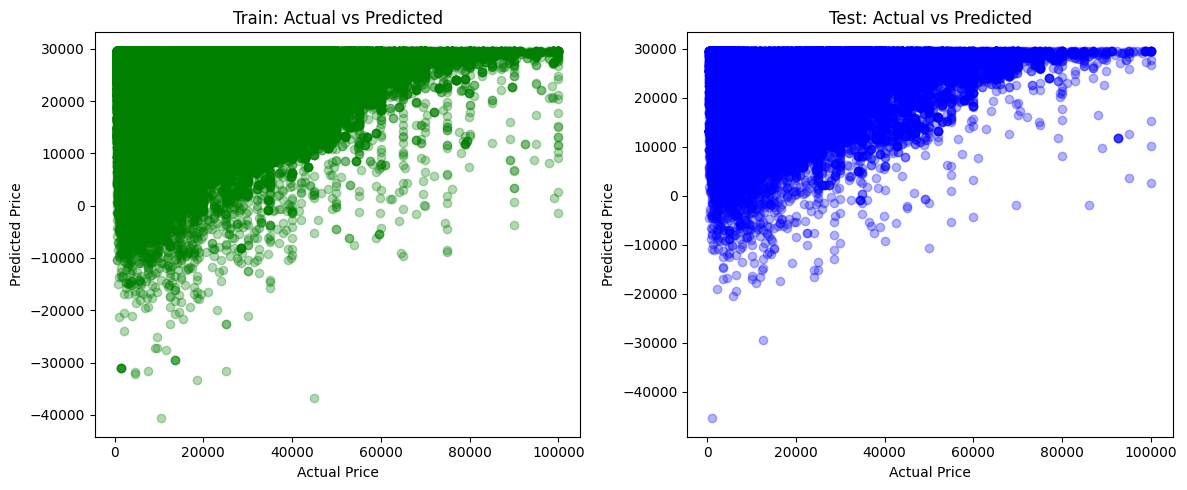

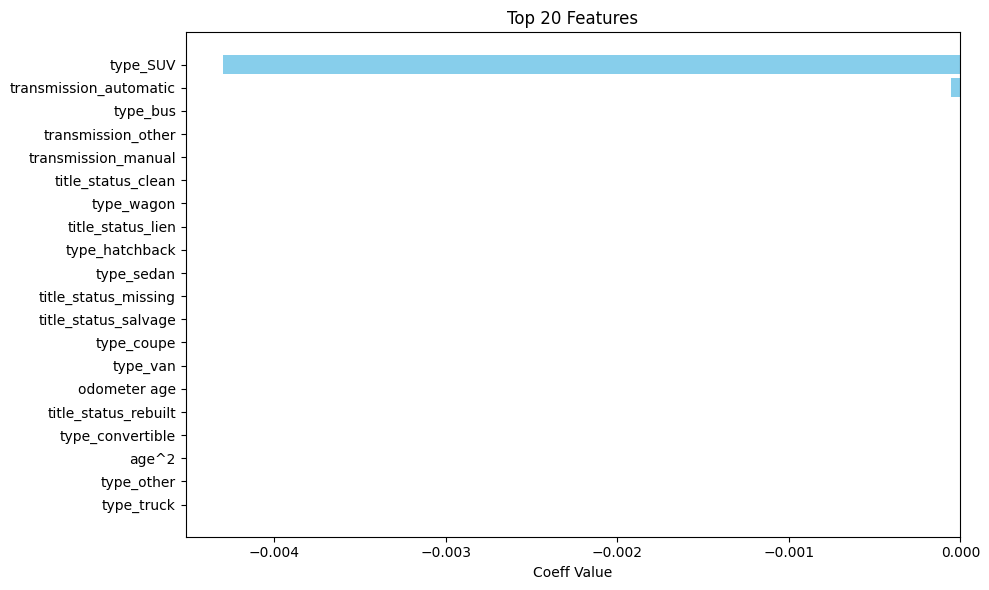

,feature,coefficient
3,type_SUV,-0.0042996978
0,transmission_automatic,-0.0000560235
4,type_bus,-0.0000027492
2,transmission_other,-0.0000005732
1,transmission_manual,-0.0000000697
17,title_status_clean,-0.0000000027
16,type_wagon,0.0000000022
18,title_status_lien,0.0000000020
7,type_hatchback,0.0000000008
12,type_sedan,-0.0000000008


In [17]:
# evaluate polynomial model MSE and coeff
y_train, train_preds, y_test, test_preds, pipeline, train_mse, test_mse, importances_df = eval_poly

# Print errors
display(pipeline)
print(f"Train MSE: {train_mse:,.2f}")
print(f"Test MSE: {test_mse:,.2f}")

# Plot test vs train data
plot_test_train(y_train, train_preds, y_test, test_preds)

# Plot coeffs
plot_coeff(importances_df.head(20))
display(importances_df.head(20))

In [ ]:
# Decide which model is better
# - Neither of the models fares greatly it terms of predicted vs. actual data
# - Test vs. Train fit, however, looks good
# - The Linear model seems better since
#   - its MSE is much less
#   - the prediction seems better due to less negative price points
#   - feature coeff are more uniformly distributed (much like the correlation matrix)

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
# polynomial model has higher train and test MSE
# from the fitting graph we can see the price predictions with polynomial has more negative spread on price
# feature coeff for polynomials make less sense than the one without polynomials

# this makes using the model without polynomials more reasonable

In [ ]:
# Based on the above analysis, dealers should be focused on:
# - Selling cars that have clean title (even those which are financed/in lien) and avoid salvage and rebuilt cars
# - Trucks and Pickups have more value than sedan, hatchback, SUV, Wagon - aka family cars have less resale value compared to commercial cars
# - Automatic transmission rather than manual
# - Age has very little impact on the resale value
# - Odometer doesn't show up in the top 20 features